In [1]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from obspy.signal.invsim import cosine_taper
from scipy.signal import fftconvolve

In [2]:
st = read("RJOB_061005_072159.ehz.new")

In [3]:
tr = st[0]

In [4]:
soil_profile = {
    'thickness': [10, 20, 30],
    'density': [1800, 1900, 2000],  
    'vs': [300, 400, 500],  
    'damping': [0.05, 0.05, 0.05] 
}

In [5]:
taper = cosine_taper(len(tr.data), 0.1)
input_motion = tr.data * taper

In [6]:
transfer_function = np.ones_like(input_motion)
for i in range(len(soil_profile['thickness'])):
    transfer_function *= np.exp(-soil_profile['damping'][i] * np.arange(len(input_motion)) / len(input_motion))

In [7]:
surface_response = fftconvolve(input_motion, transfer_function, mode='same')

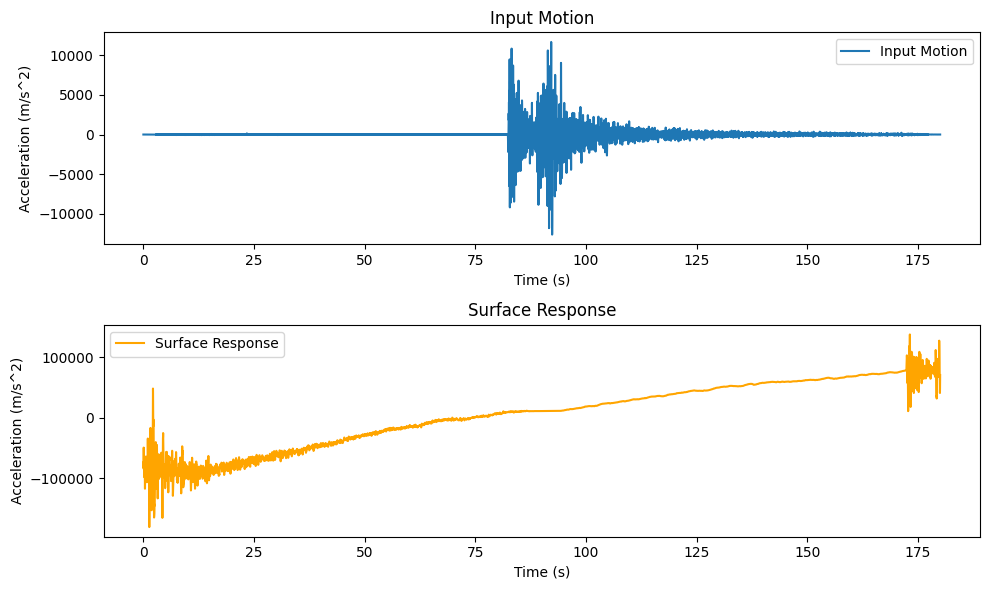

In [8]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tr.times(), input_motion, label='Input Motion')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Input Motion')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(tr.times(), surface_response, label='Surface Response', color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Surface Response')
plt.legend()

plt.tight_layout()
plt.show()